In [1]:
!pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 14.0 MB/s eta 0:00:00


In [2]:
!pip install PyMuPDF

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.6/19.6 MB 23.7 MB/s eta 0:00:00


In [3]:
import fitz
from urllib.request import Request, urlopen
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [4]:
pdf_path = '/content/drive/MyDrive/Proyecto_final_IA/informes_politica_monetaria/informe-politica-monetaria-julio-2024.pdf'

In [5]:
doc = fitz.open(pdf_path)

In [6]:
num_pages=len(doc)
print(f"Número de páginas: {num_pages}")

Número de páginas: 51


In [7]:
doc.get_page_text(pno=10)


'Gráfco 1.3 \nProducto interno bruto, acumulado 4 trimestresa/, b/, c/ \n(variación anual) \nGráfco 1.4 \nBrecha del productoa/, b/, c/ \n(acumulado 4 trimestres) \na/ El gráfco presenta la distribución de probabilidad del pronóstico y su senda \nmás probable para un horizonte a 8 trimestres. La densidad caracteriza el \nbalance prospectivo de riesgos con áreas del 30%, 60% y 90% de probabilidad \nalrededor del pronóstico central (moda), mediante la combinación de las densi-\ndades del Patacon y el 4GM. \nb/ Series desestacionalizadas y ajustadas por efectos calendario. \nc/ La distribución de probabilidad corresponde al ejercicio de pronóstico del \nInforme de julio. \nFuente: DANE; cálculos y proyecciones del Banco de la República. \na/ La estimación histórica de la brecha se calcula a partir de la diferencia entre el \nPIB observado (acumulado 4 trimestres) y el PIB potencial (tendencial; acumulado \n4 trimestres) que resulta del modelo 4GM; en el pronóstico se calcula a partir de l

# Extraer el contenido del pdf


In [8]:
text_content = [page.get_text() for page in doc]

In [9]:
text_content

['07/\n2024 \nISSN - 2711 - 1164 \n',
 ' \n \n \n \nISSN - 2711 - 1164 \nJulio de 2024 \nINFORME \nDE política \nmonetaria \n*Presentado por el equipo técnico \na la Junta Directiva, para su reunión \ndel 31 de julio de 2024. \nBanco de la República\nBogotá, D. C. (Colombia) \n',
 ' \n \n \n  \n \n \n \n \n \n \n \n \n \n \n \n \n  \n  \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \nGerencia Técnica \nHernando Vargas Herrera \nGerente \nSubgerencia de Política Monetaria e Información Económica (*) \nJuan José Ospina Tejeiro \nSubgerente \nDepartamento de Programación e Infación \nCarlos Huertas Campos \nDirector \nSección de Infación \nAdolfo León Cobo Serna \nJefe \nÉdgar Caicedo García \nJuan Pablo Cote Barón \nNicolás Martínez Cortés \nFranky Galeano Ramírez \nKaren Pulido Mahecha \nSergio Restrepo Ángel \nSección de Programación Macroeconómica \nViviana Alfonso Corredor \nJefe \nLuis Hernán Calderón López \nJohanna Barbosa Buitrago \nMarlon Salazar S

In [10]:
text_data="\n".join(text_content)
text_data

'07/\n2024 \nISSN - 2711 - 1164 \n\n \n \n \n \nISSN - 2711 - 1164 \nJulio de 2024 \nINFORME \nDE política \nmonetaria \n*Presentado por el equipo técnico \na la Junta Directiva, para su reunión \ndel 31 de julio de 2024. \nBanco de la República\nBogotá, D. C. (Colombia) \n\n \n \n \n  \n \n \n \n \n \n \n \n \n \n \n \n \n  \n  \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \nGerencia Técnica \nHernando Vargas Herrera \nGerente \nSubgerencia de Política Monetaria e Información Económica (*) \nJuan José Ospina Tejeiro \nSubgerente \nDepartamento de Programación e Infación \nCarlos Huertas Campos \nDirector \nSección de Infación \nAdolfo León Cobo Serna \nJefe \nÉdgar Caicedo García \nJuan Pablo Cote Barón \nNicolás Martínez Cortés \nFranky Galeano Ramírez \nKaren Pulido Mahecha \nSergio Restrepo Ángel \nSección de Programación Macroeconómica \nViviana Alfonso Corredor \nJefe \nLuis Hernán Calderón López \nJohanna Barbosa Buitrago \nMarlon Salazar Silva \n

(-0.5, 1599.5, 799.5, -0.5)

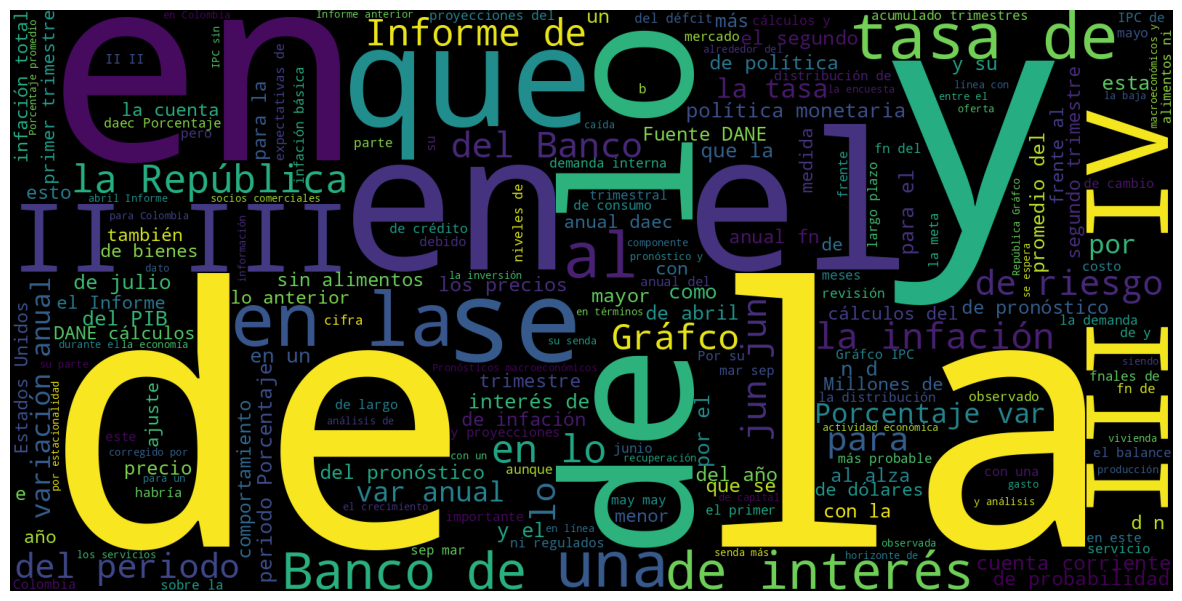

In [11]:
wordcloud = WordCloud(width=1600, height=800,).generate(text_data)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")

In [12]:
df_freq = pd.DataFrame.from_dict(data = wordcloud.words_, orient='index')
df_freq

,0
de la,1.000000
y,0.745059
en,0.498024
en el,0.397233
de lo,0.349802
...,...
actividad económica,0.033597
en términos,0.033597
se espera,0.033597
información,0.031621


In [13]:
# Guardar el DataFrame como un archivo CSV en el sistema
df_freq.to_csv('frecuencia_palabras.csv', header=True)

from google.colab import files

# Descargar el archivo CSV
#files.download('frecuencia_palabras.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: >

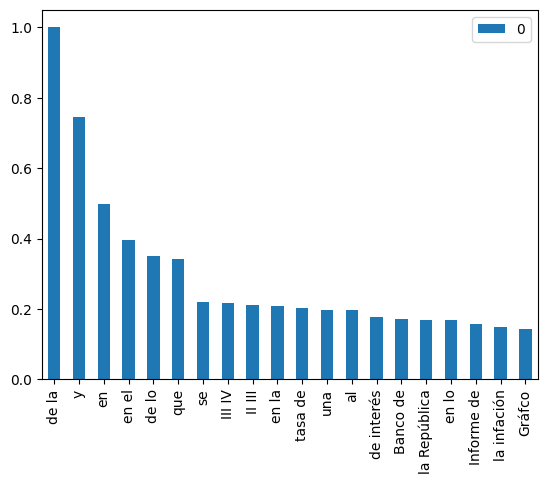

In [14]:
df_freq = df_freq.head(20)
df_freq.plot.bar()

# Limpiar texto

In [15]:
import re

In [16]:
df=pd.DataFrame(text_content,columns=['text'])
df

,text
0,07/\n2024 \nISSN - 2711 - 1164 \n
1,\n \n \n \nISSN - 2711 - 1164 \nJulio de 2024...
2,\n \n \n \n \n \n \n \n \n \n \n \n \n \n \n...
3,\n \n \n \n \n \n \n \n \n \nPolítica monetar...
4,
5,\n \n \n \n \n \n \n \n \n \n \n \n \n \nCont...
6,
7,\n \n \n \n \n \n \n \n \n \n \n \n \n \n \n ...
8,\n \n \n \n \n \n \n \n \n \n \n \n \n \n \n ...
9,1. Resumen \nGráfco 1.1 \nÍndice de precios al...


In [17]:
df['text'][48]

'48 \nAnexo\n \n \n \n \n \n  \nII \nAnexo 3 \nDensidades predictivas para otras variables relevantes del pronóstico \nmacroeconómico \nGráfco A3.1 \nGráfco A3.3 \nSupuesto trimestral del crecimiento 12 meses de los \nSupuesto trimestral de la tasa de interés de la \nsocios comerciales con base en las proyecciones anuales, \nReserva Federal de los Estados Unidos, \ndensidad predictivaa/ \ndensidad predictivaa/ \n(porcentaje) \n(porcentaje) \n7,0 \n6,0 \n5,0 \n4,0 \n3,0 \n2,0 \n1,0 \n0,0 \n-1,0 \n7,0 \n6,0 \n5,0 \n4,0 \n3,0 \n2,0 \n1,0 \n0,0\nIII \nIV \nI \nII \nIII \nIV \nI \nII \nIII \nIV \nI \nII \nIII \nIV \nI \nII \n2022 \n2023 \n2024 \n2025 \n2026 \nII \nIII \nIV \nI \nII \nIII \nIV \nI \nII \nIII \nIV \nI \nII \nII\nIII \nIV \nI \n2022 \n2023 \n2024 \n2025 \n2026 \n30% \nInforme de julio\n90% \n60% \na/ El gráfco presenta la distribución de probabilidad del pronóstico y su senda \nmás probable para un horizonte a 8 trimestres. La densidad caracteriza el balance \nprospectivo de r

In [18]:
re.findall(
    '(((?:http:\/\/www\.|https:\/\/www\.|http:\/\/|https:\/\/)?\w+(?:[-.]{1}\w+)*\.[a-z]{2,5}(?:\/)?(?:(?:[^\s@])*(?:\/)?)*))',
    text_data
    )

[('banrep.gov.co', 'banrep.gov.co'),
 ('https://www.banrep.gov.co/es/', 'https://www.banrep.gov.co/es/'),
 ('https://www.banrep.gov.co/en/4gm-new-model-monetary-',
  'https://www.banrep.gov.co/en/4gm-new-model-monetary-'),
 ('https://www.banrep.gov.co/es/reporte-mercado-laboral.',
  'https://www.banrep.gov.co/es/reporte-mercado-laboral.'),
 ('https://investiga.banrep.gov.co/es/be-1122.',
  'https://investiga.banrep.gov.co/es/be-1122.'),
 ('https://investiga.banrep.gov.co/es/be-1122.',
  'https://investiga.banrep.gov.co/es/be-1122.'),
 ('https://investiga.banrep.gov.co/es/be-1122.',
  'https://investiga.banrep.gov.co/es/be-1122.'),
 ('http://www.banrep.gov.co/', 'http://www.banrep.gov.co/'),
 ('https://investiga.banrep.gov.co/es/be-1122.',
  'https://investiga.banrep.gov.co/es/be-1122.'),
 ('https://investiga.banrep.gov.co/es/be-1122.',
  'https://investiga.banrep.gov.co/es/be-1122.'),
 ('https://investiga.banrep.gov.co/es/be-1122.',
  'https://investiga.banrep.gov.co/es/be-1122.'),
 ('

In [19]:
p= re.compile(r'(\b[a-z]+[a-z0-9]*[-._]?[a-z0-9]+@[a-z]+(?:[.][a-z]+[_]?[a-z0-9]+)*[.][a-z]{2,})',re.MULTILINE)
p.findall(text_data)

['atencionalciudadano@banrep.gov.co']

In [20]:
from string import punctuation

In [21]:
list(punctuation)

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [22]:
def clean_text(df, text_field):
    # Convertir a minúsculas
    df[text_field] = df[text_field].str.lower()

    # Eliminar caracteres no alfabéticos que no sean números, excluyendo signos de puntuación importantes
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r'[^\w\s,.]', '', elem))  # Mantiene comas y puntos

    # Eliminar signos de puntuación innecesarios
    non_words = list(punctuation)
    non_words.extend(['¿', '¡', '‘', '’'])
    df[text_field] = df[text_field].apply(lambda elem: ''.join([c for c in elem if c not in non_words]))

    # Sustituir espacios de más
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r'\s+', ' ', elem))

    return df



In [23]:
df_clean = clean_text(df.copy(), 'text')
df_clean.head(6)

,text
0,07 2024 issn 2711 1164
1,issn 2711 1164 julio de 2024 informe de polít...
2,gerencia técnica hernando vargas herrera gere...
3,política monetaria en colombia de acuerdo con...
4,
5,contenido 1 resumen 9 11 resumen macroeconómi...


In [24]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from string import punctuation


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [36]:
stop_words = stopwords.words('spanish')
stop_words

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [49]:

additional_stopwords = [
    'iii', 'iv', 'ii', 'iii', 'tasa de', 'de interés', 'banco de', 'la república', 'informe de', 'la inflación', 'gráfico', 'gráfco',
    'del banco', 'de riesgo', 'en lo', 'del periodo', 'por el', 'de política', 'política monetaria', 'interés de',
    'cuenta corriente', 'del pib', 'política monetaria', 'trimestre', 'la tasa', 'inflación total', 'inflación básica',
    'de probabilidad', 'de pronóstico', 'proyecciones del', 'sin alimentos', 'alimentos ni regulados', 'horizonte de',
    'actividad económica', 'fuente dane', 'estados unidos', 'colombia', 'en el segundo', 'del año', 'var anual', 'jun jun',
    'sep mar', 'segundo trimestre', 'frente al', 'del pronóstico', 'junio',
    'banco república', 'porcentaje var', 'variación anual', 'tasa interés', 'mayor', 'año', 'precio', 'periodo porcentaje',
    'n d', 'fn periodo', 'segundo', 'niveles', 'servicio', 'promedio periodo', 'parte', 'informe abril', 'anual fn',
    'informe julio', 'd n', 'ipc alimentos', 'crecimiento', 'consumo', 'inversión', 'dane cálculos', 'tasas interés',
    'anterior', 'ajuste', 'cálculos banco', 'tasa', 'menor', 'interés política', 'alimentos regulados', 'millones dólares'
]


In [50]:
stop_words.extend(additional_stopwords)

In [51]:
stop_words

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [52]:
# # Guardar el DataFrame como un archivo CSV en el sistema
# df_clean.to_csv('text_clean_stop.csv', header=True)

# from google.colab import files

# # Descargar el archivo CSV
# files.download('text_clean_stop.csv')

In [53]:
df_clean['text_clean_stop'] = df_clean['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df_clean.head()

,text,text_clean_stop
0,07 2024 issn 2711 1164,07 2024 issn 2711 1164
1,issn 2711 1164 julio de 2024 informe de polít...,issn 2711 1164 julio 2024 política monetaria p...
2,gerencia técnica hernando vargas herrera gere...,gerencia técnica hernando vargas herrera geren...
3,política monetaria en colombia de acuerdo con...,política monetaria acuerdo mandato constitucio...
4,,


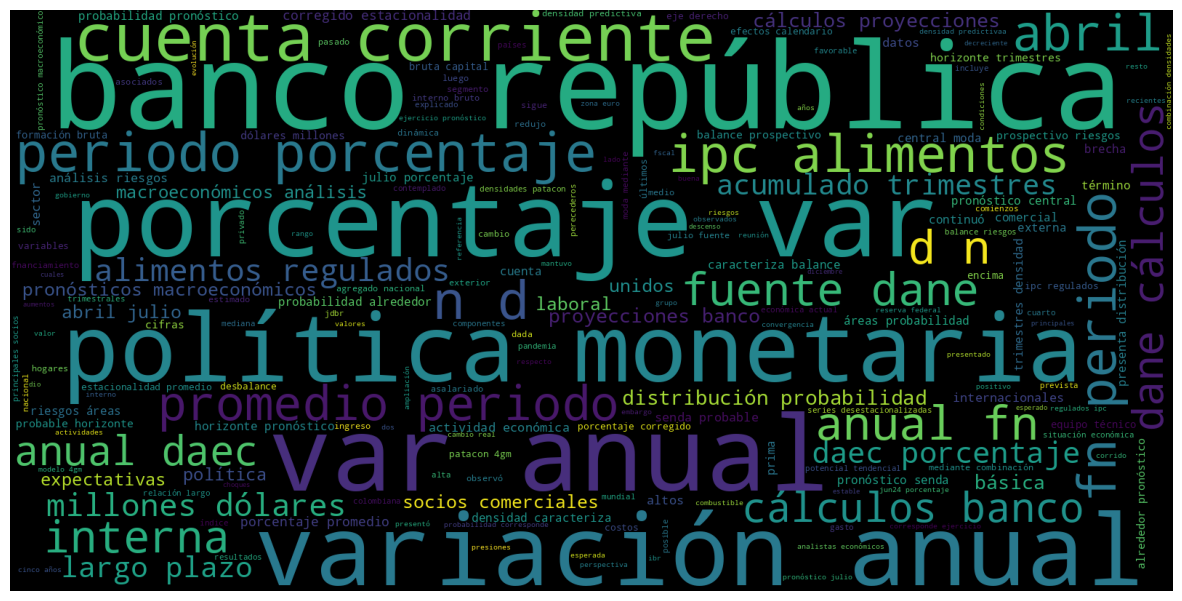

In [54]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
text = ' '.join(txt for txt in df_clean.text_clean_stop)
wordcloud = WordCloud(width=1600, height=800).generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [55]:
wordcloud.words_

{'banco república': 1.0,
 'var anual': 0.7441860465116279,
 'porcentaje var': 0.7325581395348837,
 'variación anual': 0.6744186046511628,
 'política monetaria': 0.6162790697674418,
 'cuenta corriente': 0.5930232558139535,
 'periodo porcentaje': 0.5348837209302325,
 'n d': 0.5232558139534884,
 'ipc alimentos': 0.5,
 'fn periodo': 0.5,
 'abril': 0.47674418604651164,
 'promedio periodo': 0.4418604651162791,
 'anual fn': 0.4186046511627907,
 'd n': 0.4069767441860465,
 'fuente dane': 0.3953488372093023,
 'interna': 0.38372093023255816,
 'dane cálculos': 0.3488372093023256,
 'cálculos banco': 0.32558139534883723,
 'anual daec': 0.32558139534883723,
 'alimentos regulados': 0.313953488372093,
 'millones dólares': 0.313953488372093,
 'daec porcentaje': 0.3023255813953488,
 'largo plazo': 0.29069767441860467,
 'acumulado trimestres': 0.27906976744186046,
 'distribución probabilidad': 0.27906976744186046,
 'básica': 0.26744186046511625,
 'cálculos proyecciones': 0.26744186046511625,
 'proyeccion

In [56]:
# Generar la nube de palabras
text = ' '.join(txt for txt in df_clean.text_clean_stop)
wordcloud = WordCloud(width=1600, height=800).generate(text)

# Extraer las palabras y sus frecuencias
word_frequencies = wordcloud.words_

# Convertir las frecuencias en un DataFrame
df_wordcloud = pd.DataFrame(list(word_frequencies.items()), columns=['Palabra', 'Frecuencia'])

# Mostrar el DataFrame
df_wordcloud.head()  # Puedes usar esto para ver las primeras filas del DataFrame

,Palabra,Frecuencia
0,banco república,1.000000
1,var anual,0.744186
2,porcentaje var,0.732558
3,variación anual,0.674419
4,política monetaria,0.616279


In [57]:
# Guardar el DataFrame como un archivo CSV en el sistema
df_wordcloud.to_csv('word_cloud.csv', header=True)

from google.colab import files

# Descargar el archivo CSV
files.download('word_cloud.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>